/var/folders/3_/88fnw31x1cjdm9rfc7jyr5br0000gn/T/ipykernel_40713/3778290784.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, y1, "r", marker='.', ms=5, linewidth='1.5', label="内置策略响应时间",  color = 'black', linestyle='--')


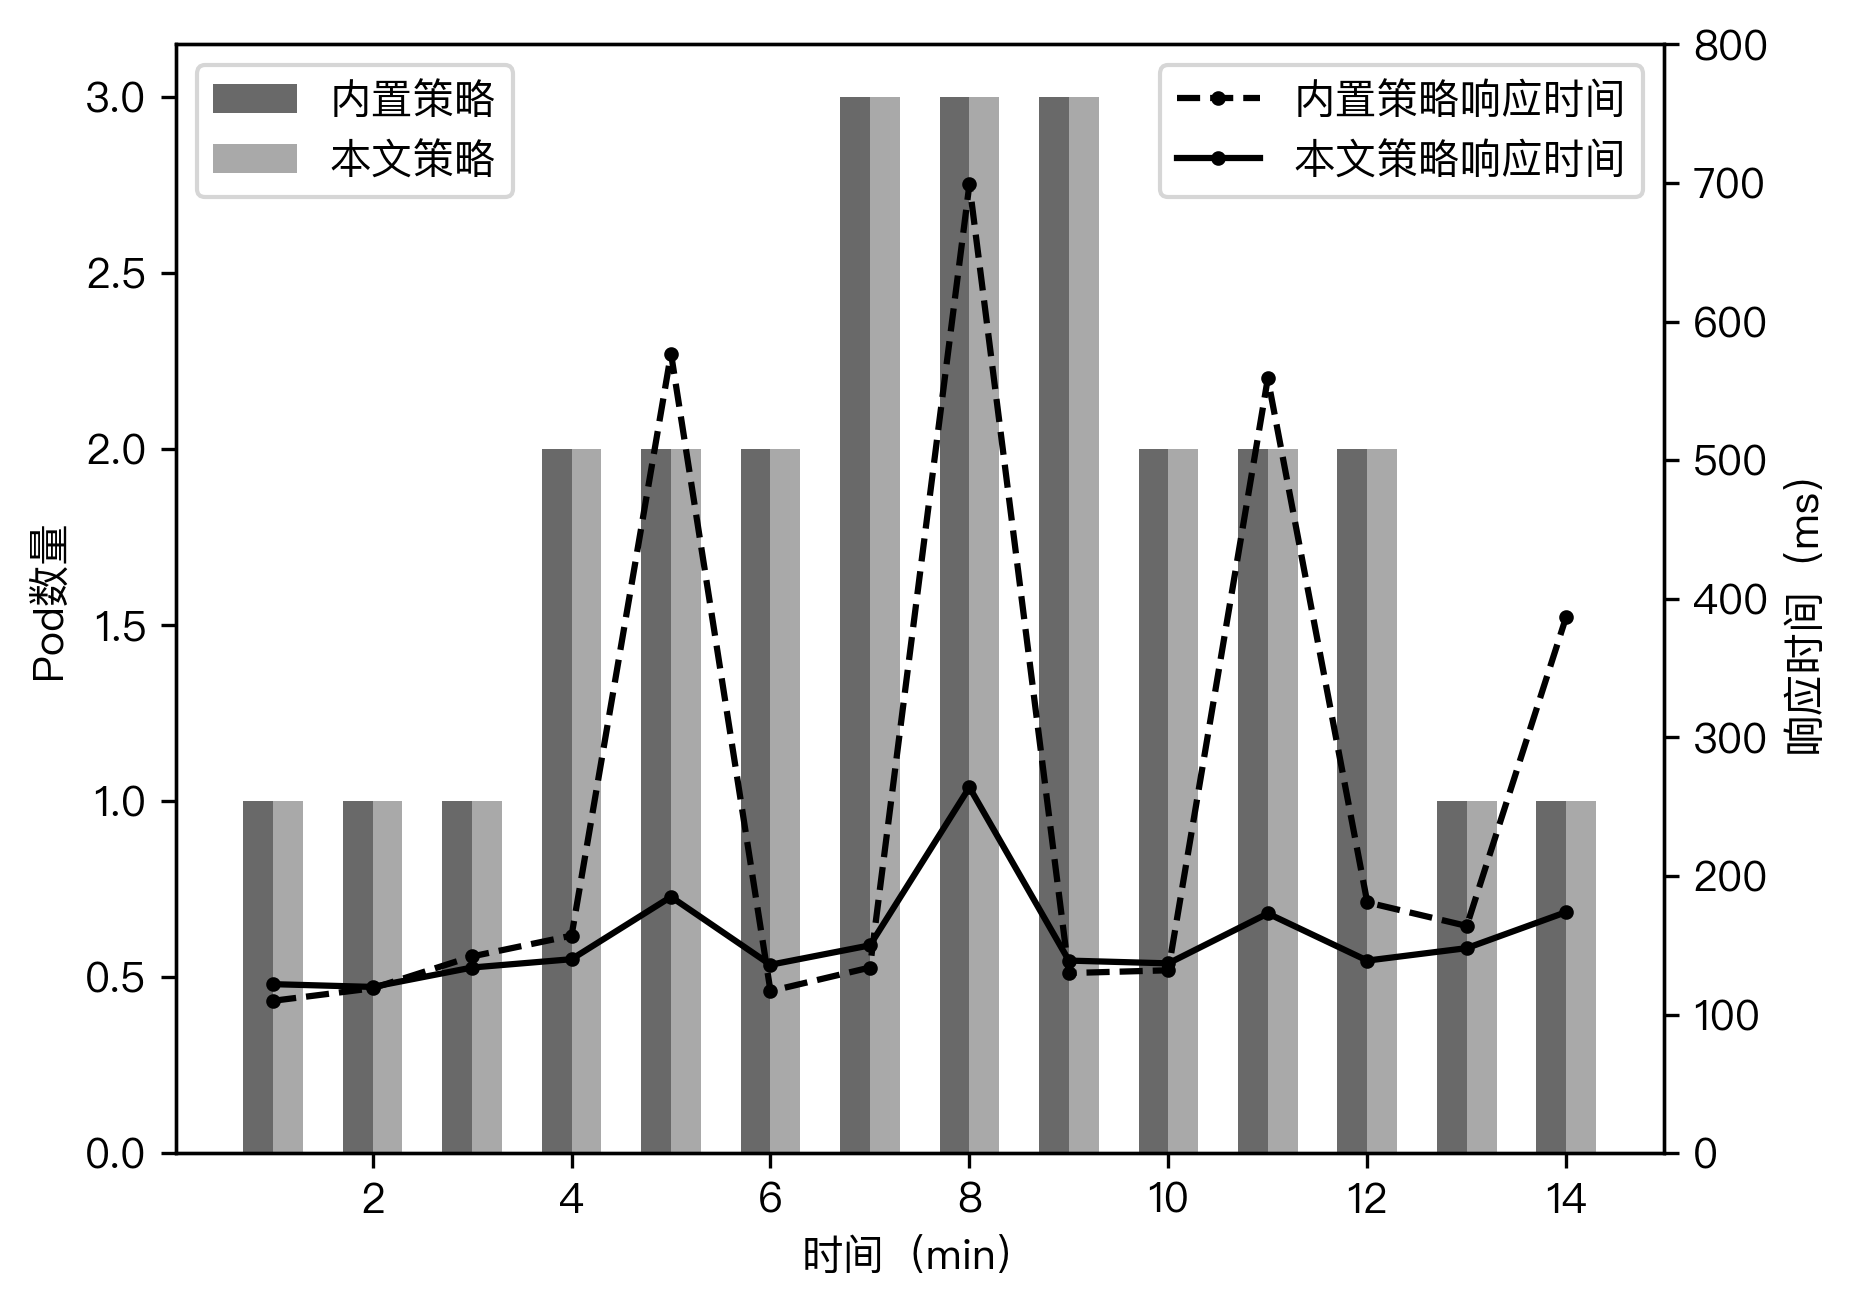

In [108]:
# -*- coding:utf-8 -*-
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
matplotlib.rcParams['font.sans-serif'] = ['PingFang HK']
 
# 构建数据
x = np.arange(1, 15)
y1 = [110, 119, 142, 157, 577, 117, 134, 699, 130, 132, 559, 181, 164, 387]
y2 = [122, 120, 134, 140, 185, 136, 150, 264, 139, 137, 173, 139, 148, 174]

z = [1, 1, 1, 2, 2, 2, 3, 3, 3, 2, 2, 2, 1, 1]
u = [1, 1, 1, 2, 2, 2, 3, 3, 3, 2, 2, 2, 1, 1]
 

plt.figure(dpi=300)
# 绘柱状图
width = 0.3  # 柱子的宽度
# plt.bar(x - width/2, first, width, label='1')
# plt.bar(x + width/2, second, width, label='2')
plt.bar(x-width/2, z, width, label='内置策略', color = '#696969')
plt.bar(x+width/2, u, width, label='本文策略', color = '#A9A9A9')
# 在左侧显示图例
plt.legend(loc="upper left")

# 设置标题
# plt.title("标题")
# 为两条坐标轴设置名称
plt.xlabel("时间（min）")
plt.ylabel("Pod数量")
 
 
# 画折线图
ax2 = plt.twinx()
ax2.set_ylabel("响应时间（ms）")
# 设置坐标轴范围
ax2.set_ylim([0, 800]);
plt.plot(x, y1, "r", marker='.', ms=5, linewidth='1.5', label="内置策略响应时间",  color = 'black', linestyle='--')
plt.plot(x, y2 , marker='.', ms=5, linewidth='1.5', label="本文策略响应时间", color = 'black')

# 显示数字
# for a, b in zip(x, y):
#     plt.text(a, b, b, ha='center', va='bottom', fontsize=8)
# 在右侧显示图例
plt.legend(loc="upper right")
plt.savefig("recall.png")
 
plt.show()
 

<Figure size 1920x1440 with 0 Axes>

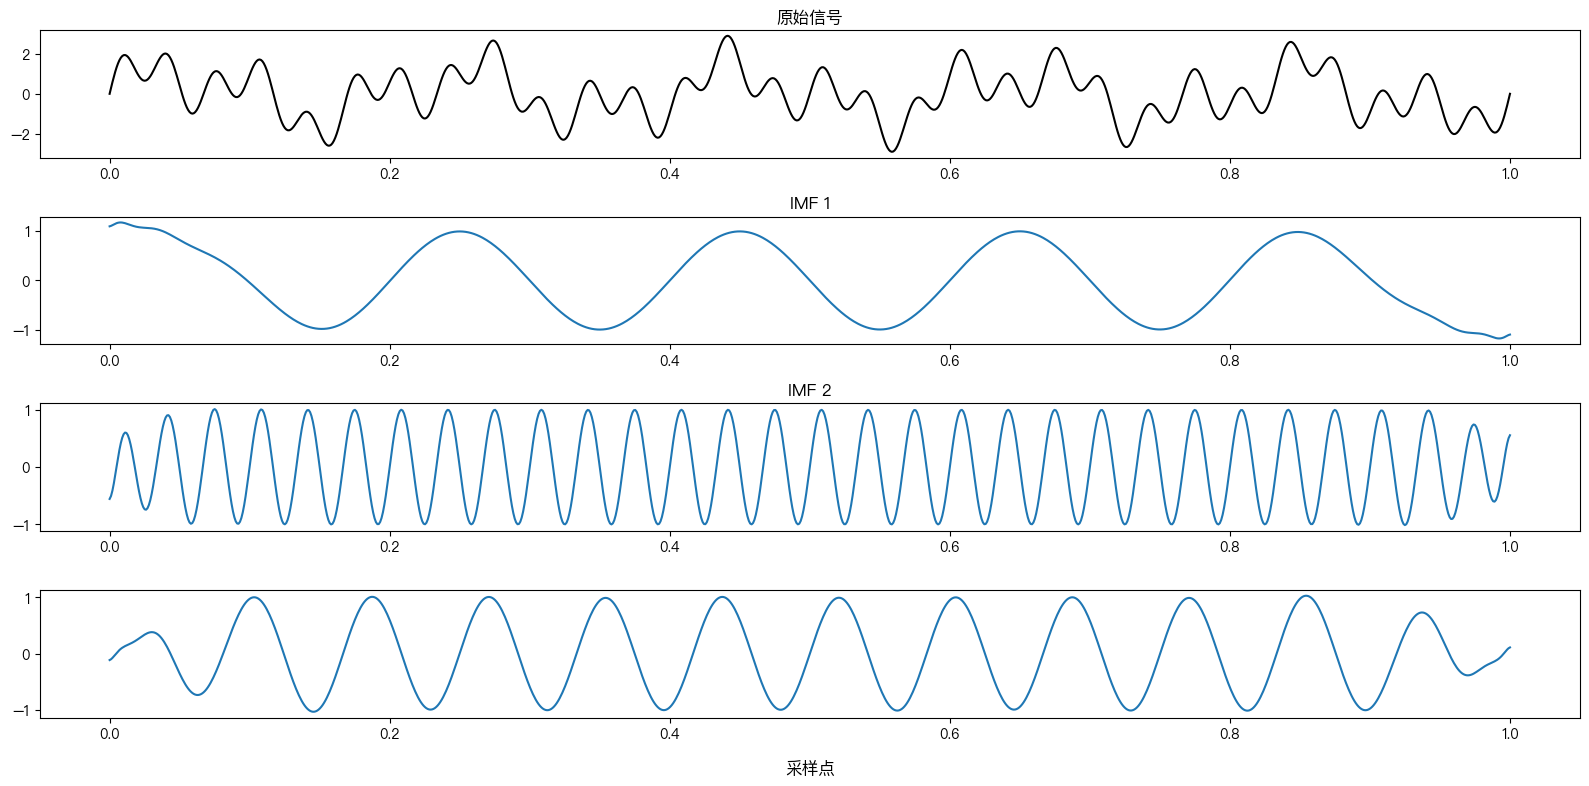

In [107]:
import numpy as np
import matplotlib.pyplot as plt
from vmdpy import VMD

# 创建一个由三个不同频率的正弦波叠加而成的信号
fs = 1000  # 采样频率

t = np.linspace(0, 1, fs)  # 时间向量
f1, f2, f3 = 5000, 12000, 30000  # 三个正弦波的频率
x1 = np.sin(2 * np.pi * f1 * t)
x2 = np.sin(2 * np.pi * f2 * t)
x3 = np.sin(2 * np.pi * f3 * t)
x = x1 + x2 + x3  # 叠加信号

# VMD参数
alpha = 2000       # moderate bandwidth constraint
tau = 0.            # noise-tolerance (no strict fidelity enforcement)
K = 3               # 3 modes
DC = 0              # no DC part imposed
init = 1            # initialize omegas uniformly
tol = 1e-7

# VMD分解
u, u_hat, omega = VMD(x, alpha, tau, K, DC, init, tol)

plt.figure(dpi=300)
matplotlib.rcParams['font.sans-serif'] = ['PingFang HK']
# 绘制原始信号
plt.figure(figsize=(16, 8))
plt.subplot(4, 1, 1)
plt.plot(t, x, 'k')
plt.title('原始信号')

# 检查 u 的形状并转置（如果需要）
if u.shape[0] == 3:
    u = u.T

# 绘制 VMD 分解后的每个模式
for i in range(K):
    plt.subplot(4, 1, i+2)
    plt.plot(t, u[:, i])
    plt.title('IMF {}'.format(i+1))

    
plt.title('采样点', y=-0.5)
plt.tight_layout()
plt.savefig("vmd.png")
plt.show()
